# Multiple Linear Regression   
> Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

1. **Analyze tips data from seaborn**
    - Total Bill and Size as Independent Variable
    - Tips as Dependent Variable
2. **Analyze the reletionship**   
3. **Apply Multiple Linear Regression**    
4. **Perform F-Test and T-Test**    
5. **Interpret the result**


## Data and Library

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



## Model

In [3]:
y = tips['tip'] # Dependent Variable
x = tips[['total_bill', 'size']] # Independent Variable

In [4]:
model = sm.OLS(y, x) # Model Definition
result = model.fit() #Fitting Model

In [5]:
print(result.summary()) # OLS Regresison

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           9.67e-34
Time:                        18:52:08   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

**Summary Result point:**
1. Adj. R-Square = 46.3 % : It means the model can explain 46.3 % variance value from tips, the rest explained by other variable that not included in model.
2. Prob (F-Statistics) = F-Test = 9.67e-34 : Less than alpha(0.05), it means there is one independent variable (total_bill or size) has a significant effect on dependent variable (9.67e-34 < 0.05)
3. Prob Coef for every variable = Bo and B1     
    - Bo p-value : 0.001 < 0.05, reject Ho: it means we need intercept in model     
    - B1 p-value : 0.000 < 0.05, reject Ho: it means total_bill has positive effect on tips
    - B2 p-value : 0.025 < 0.05, reject Ho: it means size has positive effect on tips
4. Coef for every variable = T-Test Prob from Bo, B1
    tips = 0.6689 + 0.0927 total_bill + 0.1926 size
    - Bo : 0.6689, tip value when total_bill = 0 and size = 0
    - B1 : 0.0927, for every 10 dollars increase in total_bill, tips will increase by approximately 0.927 dollars. (This interpretation only accepted when total_bill 3.07 - 50.81 dollars)
    - B2 : 0.1926, for every 10 dollars increase in total_bill, tips will increase by approximately 1.926 dollars (This interpretation only accepted when size 1 - 6 persons)

In [6]:
tips[['total_bill', 'size']].describe() # Descriptive Statistics

,total_bill,size
count,244.000000,244.000000
mean,19.785943,2.569672
std,8.902412,0.951100
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.000000
75%,24.127500,3.000000
max,50.810000,6.000000


## Model Diagnostics and Multicollinearity
1. **Analyze tips data from seaborn**
    - Total Bill and Size as Independent Variable
    - Tips as Dependent Variable
1. **Apply Multiple Linear Regression**   
1. **Check the Normality Assumption**
1. **Check the Gauss-Morkov Assumption**  
1. **Check the Multicollinearity**

> ### Normality Assumption

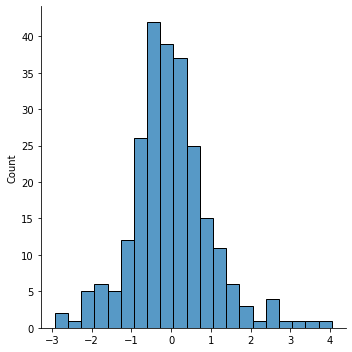

In [7]:
sns.displot(result.resid) # Residual Histogram
plt.show()

Histogram looks normally distribute, we assume the assumptions are met
> ### Gauss-Markov Assumption
    1. Error mean = 0
    2. Error not correlated
    3. Error variance homogeneous 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


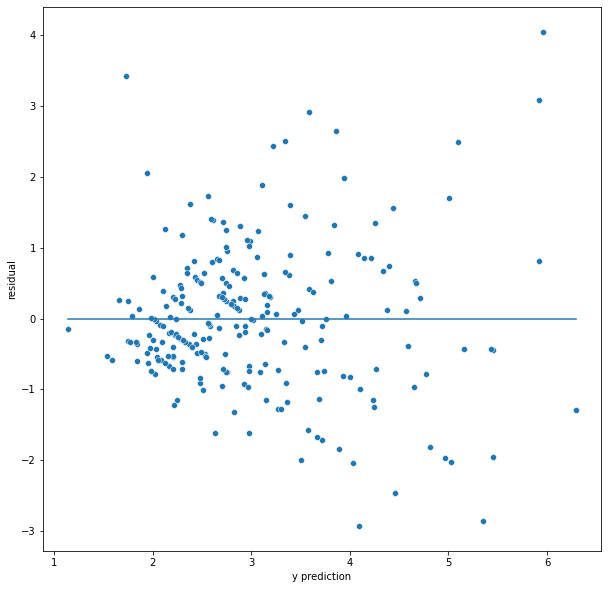

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = result.fittedvalues, y = result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('y prediction')
plt.ylabel('residual')
plt.show()

1. Error mean = 0 : assumptions are considered fulfilled
2. Error not correlated : assumptions are considered fulfilled because no pattern
3. Error variance homogeneous : indicated homoscedasticity problem
> ### Multicollinearity

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
x.drop(columns = 'const')

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [12]:
def calc_vlf(x): # Function to calculate vif
    vif = pd.DataFrame()
    vif['variable'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values, 1) for i in range(x.shape[1])]
    return vif

In [14]:
calc_vlf(x.drop(columns = 'const'))

,variable,vif
0,total_bill,8.684373
1,size,8.684373


There is an indication of multicollinearity because VIF > 4

_____
## Summary
1. Normality Assumption: we considered unfulfilled, so F-Test and T-Test valid
2. Gauss-Markov:
    - Error mean = 0 : we considered fulfilled, so beta value and prediction value not biased
    - Error not correlated : we considered fulfilled, R-Sq and p-value T-Test not biased
    - Error variance homogeneous : we considered not fulfilled because indicated homoscedasticity problem, so unstable prediction result and regression parameter estimate. Solution use other model.
3. Multicollinearity: we considered unfulfilled because indicated multicollinearity but not too bad. Solution feature selection or PCA.